# Prisoners Data Visualization

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd

### Step 2: Load the data and display first 5 and last 5 records

In [2]:
data=pd.read_csv('Prisoners-Dataset.csv')

In [3]:
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


### Step 3: Describe the data

### Step 4: Create a column 'total_benefitted' that shows sum of inmates with respect to each State/UT

In [4]:
data.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


### Step 5: Create a bar char with total benefitted inmates values in descending order

In [5]:
data.drop('YEAR',axis=1,inplace=True)

In [6]:
data['total']=data.sum(axis=1)

In [7]:
data.head()

,STATE/UT,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total
0,Andhra Pradesh,9480,13758,672,170,24080
1,Arunachal Pradesh,0,0,0,0,0
2,Assam,676,750,14,30,1470
3,Bihar,1693,3013,125,1417,6248
4,Chhatisgarh,1664,1803,192,103,3762


In [8]:
import matplotlib.pyplot as plt

In [9]:
data.sort_values('total',ascending=False,inplace=True)

In [10]:
data.head()

,STATE/UT,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total
0,Andhra Pradesh,9480,13758,672,170,24080
25,Uttar Pradesh,7876,8093,1353,212,17534
13,Madhya Pradesh,1978,9574,301,151,12004
6,Gujarat,2310,3133,875,966,7284
10,Jharkhand,3008,2595,138,574,6315


In [11]:
total_benefitted_values=data[:8]

In [12]:
total_benefitted_values=total_benefitted_values.set_index('STATE/UT')

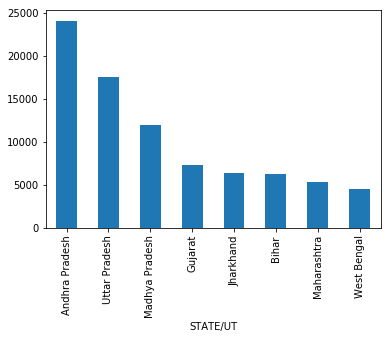

In [13]:
total_benefitted_values['total'].plot(kind='bar')
plt.savefig('sample0.png')

In [14]:
import seaborn as sns

In [15]:
sns.set()

In [16]:
font={
    'size':20
    
}

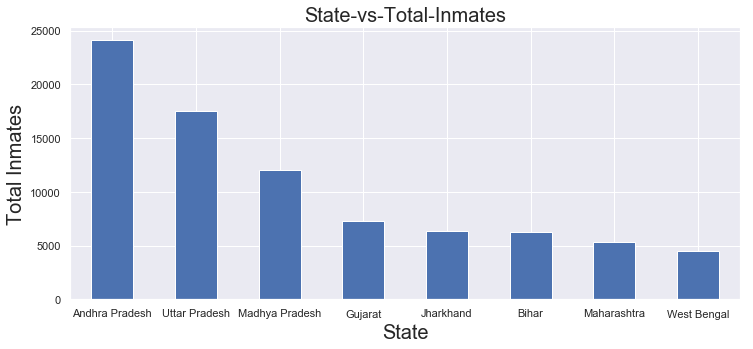

In [17]:
plt.figure(figsize=(12,5))
total_benefitted_values['total'].plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('State',fontdict=font)
plt.ylabel('Total Inmates',fontdict=font)
plt.title('State-vs-Total-Inmates',fontdict=font)
plt.savefig('sample1.png')

## Step6:Create a pie chart to show ratio among different modes of benefits

In [18]:
data.rename({
  'No. of Inmates benefitted by Elementary Education':'Elementary',
  'No. of Inmates benefitted by Adult Education':'Adult',
  'No. of Inmates benefitted by Higher Education':'Higher',
  'No. of Inmates benefitted by Computer Course':'Computer'
},axis=1,inplace=True)

In [19]:
elementary_education=data['Elementary'].sum(axis=0)
adult_education=data['Adult'].sum(axis=0)
higher_education=data['Higher'].sum(axis=0)
computer_education=data['Computer'].sum(axis=0)

In [20]:
dict_var={
  'Elementary':elementary_education,
    'Adult':adult_education,
    'Higher':higher_education,
    'Computer':computer_education
}

In [21]:
dict_var=pd.Series(dict_var)

In [22]:
dict_var.sort_values(ascending=False,inplace=True)

In [23]:
dict_var

Adult         53720
Elementary    37027
Higher         8311
Computer       7356
dtype: int64

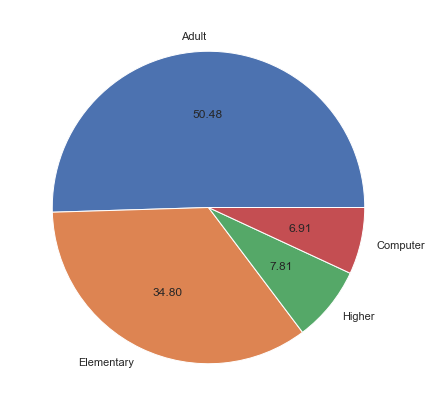

In [24]:
sns.set(rc={'figure.figsize':(7,10)})
plt.pie(dict_var,labels=dict_var.index,autopct='%.2f')
plt.savefig('sample2.png')

### Step 7: For the 5 highest benefitted states, create 
1. Bar chart. 
2. Stacked bar chart 
3. 100% stacked chart

In [25]:
new_data=total_benefitted_values.copy()

In [26]:
new_data.drop('total',axis=1,inplace=True)

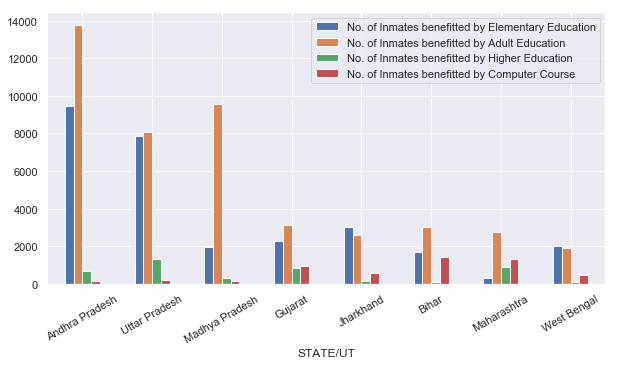

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
new_data.plot(kind='bar')
plt.xticks(rotation=30)
plt.savefig('sample3.png')

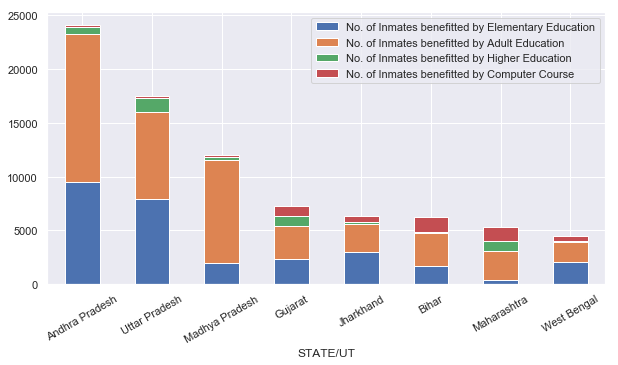

In [28]:
sns.set(rc={'figure.figsize':(10,5)})
new_data.plot(kind='bar',stacked=True)
plt.xticks(rotation=30)
plt.savefig('sample4.png')

In [29]:
new_data['total']=new_data.sum(axis=1)

In [30]:
new_data.head()

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total
STATE/UT,,,,,
Andhra Pradesh,9480,13758,672,170,24080
Uttar Pradesh,7876,8093,1353,212,17534
Madhya Pradesh,1978,9574,301,151,12004
Gujarat,2310,3133,875,966,7284
Jharkhand,3008,2595,138,574,6315


In [31]:
percentage_share=new_data.apply(lambda x: round(100*x/new_data['total']))

In [32]:
percentage_share.drop('total',axis=1,inplace=True)

In [33]:
percentage_share.head(1)

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
STATE/UT,,,,
Andhra Pradesh,39.0,57.0,3.0,1.0


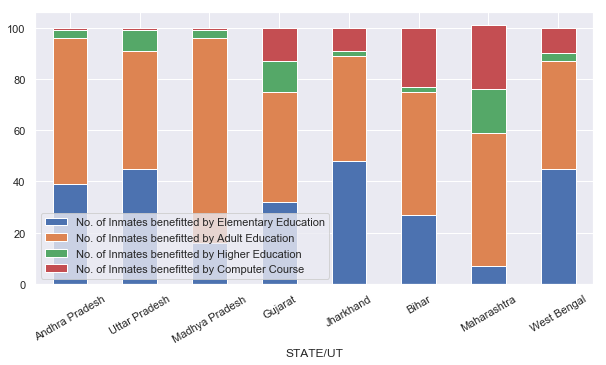

In [34]:
sns.set(rc={'figure.figsize':(10,5)})
percentage_share.plot(kind='bar',stacked=True)
plt.xticks(rotation=30)
plt.savefig('Sample5.png')